Load & Preparing Dataset
========================

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
import scipy.stats
import os


%matplotlib inline
warnings.filterwarnings('ignore')

Dataset: Stock Exchange from Kaggle

In [12]:
stock = pd.read_csv('./dataset/cryptocurrencies/HEX-USD.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0


Checking null values

In [205]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       357 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.6+ KB


In [206]:
stock.dropna(axis=0, inplace=True)
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       196 non-null    object 
 1   Open       196 non-null    float64
 2   High       196 non-null    float64
 3   Low        196 non-null    float64
 4   Close      196 non-null    float64
 5   Adj Close  196 non-null    float64
 6   Volume     196 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


Subsample 3-5 Variables
=================================
Subsampling 4 variables: Open, High, Low, and Close

In [207]:
stock = stock.iloc[:, :6]
stock.head()

,Date,Open,High,Low,Close,Adj Close
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019


Non-Parametric Estimation
===================================
Plot PDF in histogram and using KDE for each variables

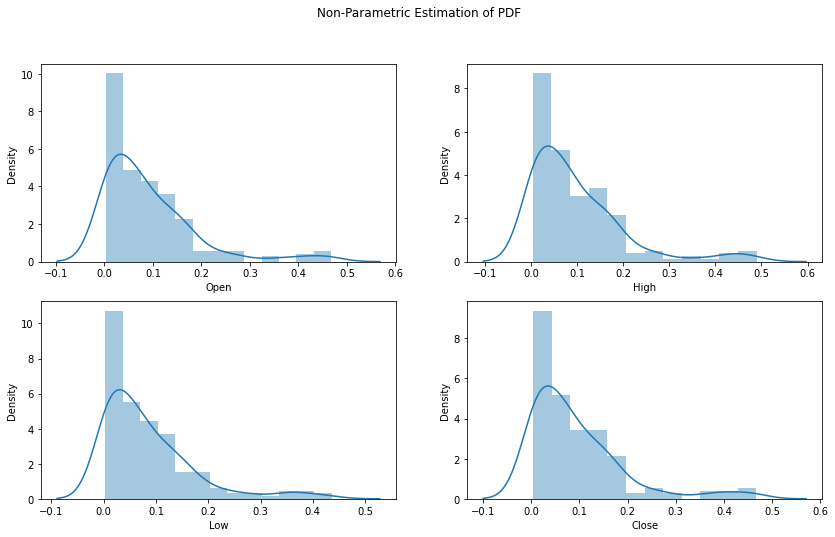

In [208]:
# initialize figure canvas
fig, ax = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle('Non-Parametric Estimation of PDF')

# plot Open variable
# sns.histplot(data=stock, x='Open', ax=ax[0,0], kde=True)
sns.distplot(stock['Open'], ax=ax[0,0], kde=True)

# plot High variable
# sns.histplot(data=stock, x='High', ax=ax[0,1], kde=True)
sns.distplot(stock['High'], ax=ax[0,1], kde=True)

# plot Low variable
# sns.histplot(data=stock, x='Low', ax=ax[1,0], kde=True)
sns.distplot(stock['Low'], ax=ax[1,0], kde=True)

# plot Close variable
# sns.histplot(data=stock, x='Close', ax=ax[1,1], kde=True)
sns.distplot(stock['Close'], ax=ax[1,1], kde=True)

plt.show()

Estimation of Order Statistics
========================================
Represent order of statistics as box-whisker plot

In [209]:
_open = stock['Open'].to_numpy()
_high = stock['High'].to_numpy()
_low = stock['Low'].to_numpy()
_close = stock['Close'].to_numpy()

# order statistics Open variable
open_quantiles = [np.quantile(_open, 0.1), np.quantile(_open, 0.25), np.quantile(_open, 0.5), np.quantile(_open, 0.75), np.quantile(_open, 0.9)]

# order statistics High variable
high_quantiles = [np.quantile(_high, 0.1), np.quantile(_high, 0.25), np.quantile(_high, 0.5), np.quantile(_high, 0.75), np.quantile(_high, 0.9)]

# order statistics Low variable
low_quantiles = [np.quantile(_low, 0.1), np.quantile(_low, 0.25), np.quantile(_low, 0.5), np.quantile(_low, 0.75), np.quantile(_low, 0.9)]

# order statistics Close variable
close_quantiles = [np.quantile(_close, 0.1), np.quantile(_close, 0.25), np.quantile(_close, 0.5), np.quantile(_close, 0.75), np.quantile(_close, 0.9)]


print('Open: ',open_quantiles)
print('High: ', high_quantiles)
print('Low: ', low_quantiles)
print('Close: ', close_quantiles)

Open:  [0.004334, 0.018855, 0.0616045, 0.1303135, 0.1857795]
High:  [0.0044535, 0.020036, 0.06948950000000001, 0.14101475, 0.19186]
Low:  [0.004156, 0.0171025, 0.0565565, 0.12164525, 0.176919]
Close:  [0.0044215, 0.0189585, 0.0634485, 0.131396, 0.188909]


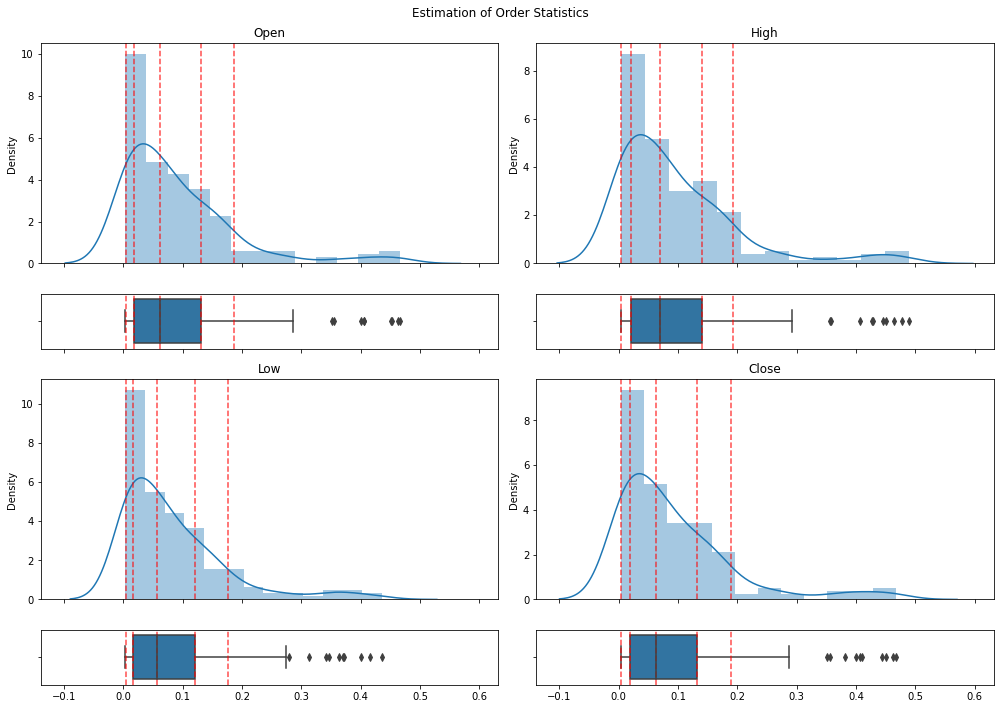

In [210]:
fig, ax = plt.subplots(4,2, figsize=(14,10), sharex=True, gridspec_kw={'height_ratios': [2,0.5,2,0.5]})
fig.suptitle('Estimation of Order Statistics')

# Open variable
# KDE plot
sns.distplot(_open, kde=True, ax=ax[0,0])
for q in open_quantiles:
    ax[0,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,0].set_title('Open')

# box-whisker plot
sns.boxplot(x=_open, ax=ax[1,0])
for q in open_quantiles:
    ax[1,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# High variable
# KDE plot
sns.distplot(_high, kde=True, ax=ax[0,1])
for q in high_quantiles:
    ax[0,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[0,1].set_title('High')

# box-whisker plot
sns.boxplot(x=_high, ax=ax[1,1])
for q in high_quantiles:
    ax[1,1].axvline(q, color='r', linestyle='--', alpha=0.7)


# Low variable
# KDE plot
sns.distplot(_low, kde=True, ax=ax[2,0])
for q in low_quantiles:
    ax[2,0].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,0].set_title('Low')

# box-whisker plot
sns.boxplot(x=_low, ax=ax[3,0])
for q in low_quantiles:
    ax[3,0].axvline(q, color='r', linestyle='--', alpha=0.7)


# Close variable
# KDE plot
sns.distplot(_close, kde=True, ax=ax[2,1])
for q in close_quantiles:
    ax[2,1].axvline(q, color='r', linestyle='--', alpha=0.7)
ax[2,1].set_title('Close')

# box-whisker plot
sns.boxplot(x=_close, ax=ax[3,1])
for q in close_quantiles:
    ax[3,1].axvline(q, color='r', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Find theoritical distribution
=========

In [211]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in stock.columns[1:]:
        try:
            dist = getattr(scipy.stats, d)
            # # boxcox
            # feature = scipy.stats.boxcox(stock[c])
            # param = dist.fit(feature[0])
            # _, kstest = scipy.stats.kstest(feature[0], d, param, N=100)
            # _, chisq = scipy.stats.chisquare(feature[0])

            # original
            feature = stock[c]
            param = dist.fit(feature)
            _, kstest = scipy.stats.kstest(feature, d, param, N=100)
            _, chisq = scipy.stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

alpha
anglit
arcsine
argus
beta
betaprime
bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang
expon
exponnorm
exponweib
exponpow
f
fatiguelife
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper
gamma
gengamma
genhalflogistic
genhyperbolic
geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
kappa4
kappa3
ksone
kstwobign
laplace
laplace_asymmetric
levy
levy_l
logistic
loggamma
loglaplace
lognorm
loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2
ncf
nct
norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm
powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular
skewcauchy
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda
uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy


In [213]:
# Top 3 distribution for Open
top_open = df_dist[df_dist['Open_kstest'] >= 0.05].sort_values(by=['Open_kstest'], ascending=False).reset_index()

# Top 3 distribution for High
top_high = df_dist[df_dist['High_kstest'] >= 0.05].sort_values(by=['High_kstest'], ascending=False).reset_index()

# Top 3 distribution for Low
top_low = df_dist[df_dist['Low_kstest'] >= 0.05].sort_values(by=['Low_kstest'], ascending=False).reset_index()

# Top 3 distribution for Close
top_close = df_dist[df_dist['Close_kstest'] >= 0.05].sort_values(by=['Close_kstest'], ascending=False).reset_index()

In [271]:
top_open.head()

,index,distribution,Open_params,Open_kstest,Open_chi2,High_params,High_kstest,High_chi2,Low_params,Low_kstest,Low_chi2,Close_params,Close_kstest,Close_chi2,Adj Close_params,Adj Close_kstest,Adj Close_chi2
0,74,pearson3,"(2.4656687968421247, 0.10176807097121288, 0.12...",0.193748,1.0,"(2.1803763241133853, 0.0674236541512272, 0.069...",0.000004,1.0,"(2.5870255870375374, 0.06148153610652592, 0.07...",2.768921e-06,1.0,"(2.418541172241701, 0.08635650826091376, 0.100...",0.023184,1.0,"(2.418541172241701, 0.08635650826091376, 0.100...",0.023184,1.0
1,65,mielke,"(0.5255585579717639, 3.658183846610579, 0.0034...",0.186709,1.0,"(0.42254634439505967, 6.927067356636812, 0.003...",0.026191,1.0,"(0.5525805538724049, 2.1593130153156754, 0.003...",1.705568e-01,1.0,"(0.4969761867728072, 3.684812958535319, 0.0034...",0.193550,1.0,"(0.4969761867728072, 3.684812958535319, 0.0034...",0.193550,1.0
2,10,chi,"(0.5328946253881637, 0.0034429999999999994, 0....",0.129096,1.0,"(0.5463267308969721, 0.0036299999999999995, 0....",0.326615,1.0,"(0.5593529845340549, 0.0033449999999999994, 0....",4.187244e-01,1.0,"(0.5184863692010311, 0.003442999999999999, 0.2...",0.113732,1.0,"(0.5184863692010311, 0.003442999999999999, 0.2...",0.113732,1.0
3,32,gengamma,"(0.9632586193317856, 0.8426554597669499, 0.003...",0.073998,1.0,"(0.8140454473585419, 0.8636942011274706, 0.003...",0.009336,1.0,"(1.094695139777496, 0.7051539263808965, 0.0033...",2.298547e-05,1.0,"(0.9553147067430123, 0.8147963443353877, 0.003...",0.131517,1.0,"(0.9553147067430123, 0.8147963443353877, 0.003...",0.131517,1.0
4,21,f,"(1.1399756310160287, 14.825153536556114, 0.003...",0.071065,1.0,"(1.0621713546261167, 1.3084162371221688, 0.003...",0.000030,1.0,"(0.7680230518936891, 1.51049251181389, 0.00334...",2.646837e-07,1.0,"(1.2757409636763228, 11.093195506184081, 0.003...",0.058083,1.0,"(1.2757409636763228, 11.093195506184081, 0.003...",0.058083,1.0


In [225]:
round(len(top_open)/5), round(len(top_high)/5), round(len(top_low)/5), round(len(top_close)/5)

(1, 1, 2, 2)

In [241]:
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

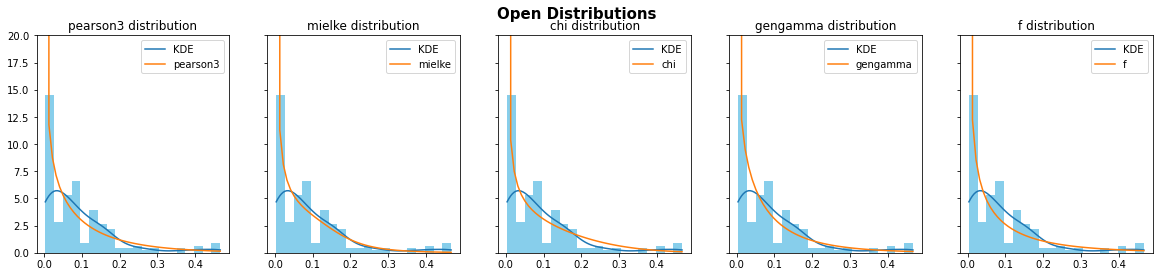

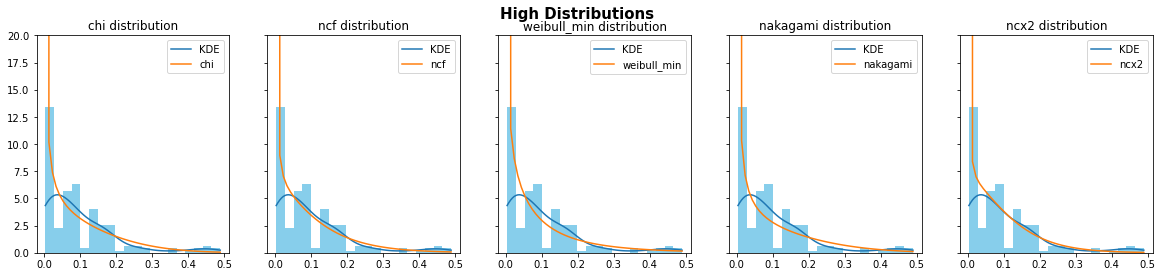

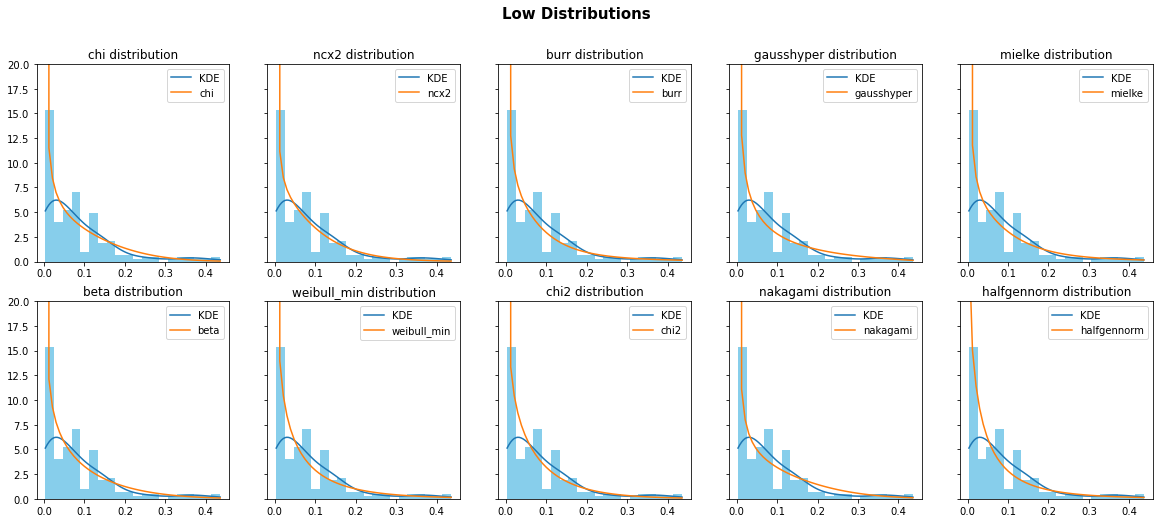

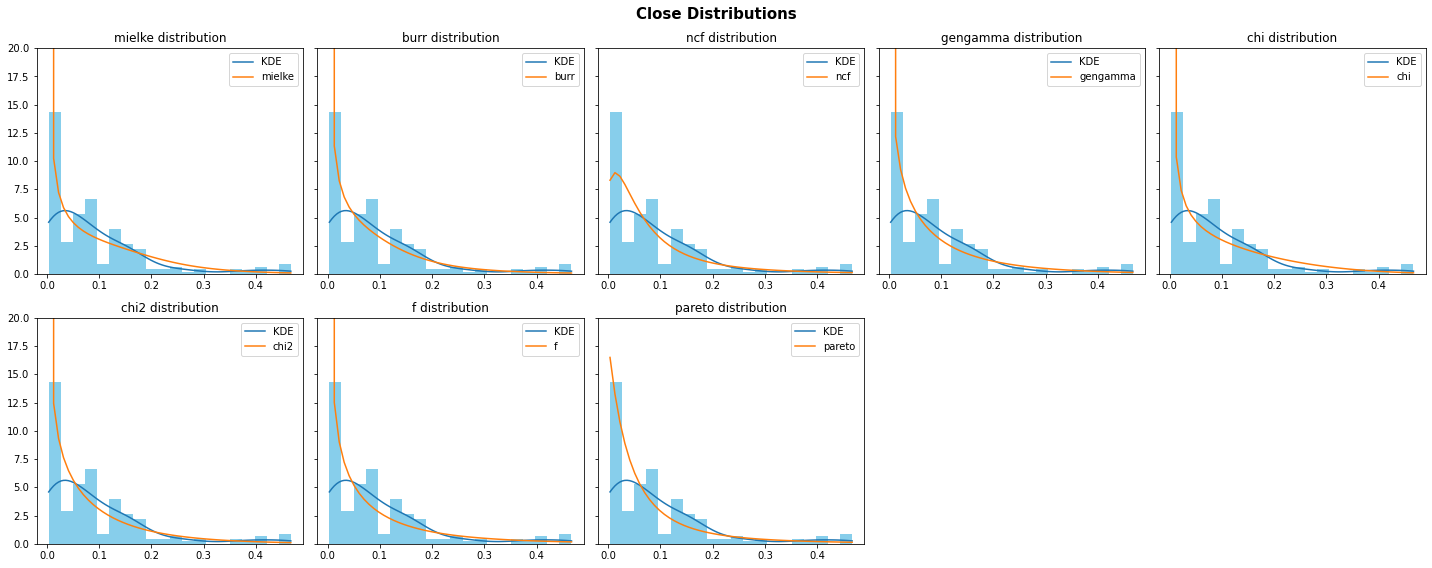

In [267]:
columns = ['Open', 'High', 'Low', 'Close']
df_dist = [top_open, top_high, top_low, top_close]

for i, col in enumerate(columns):

    feature = stock[col]

    fig_row = round(len(df_dist[i])/5)
    fig_col = 5

    figsize = (20,8) if fig_row > 1 else (20, 4)
    fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=True)
    fig.suptitle('{} Distributions'.format(col), fontsize=15, fontweight='bold')

    axs = trim_axs(ax, len(df_dist[i]))

    # default KDE for original dataset
    x = np.linspace(np.min(feature), np.max(feature))
    density = scipy.stats.kde.gaussian_kde(feature)
    xgrid = np.linspace(feature.min(), feature.max(), 100)

    for ax, row in zip(axs, df_dist[i].iterrows()):
        
        row = row[1]
        dist = getattr(scipy.stats, row['distribution'])
        params = row['{}_params'.format(columns[i])]
        
        # plot default KDE
        ax.plot(xgrid, density(xgrid), label='KDE')
        ax.hist(feature, bins=20, density=True, color='skyblue')

        # plot theoritical distribution 
        ax.plot(x, dist.pdf(x, *params), label='{}'.format(row['distribution']))

        # set plot title
        ax.set_title('{} distribution'.format(row['distribution']))    

        # enable legend
        ax.legend()

        # set ylim
        ax.set_ylim(0,20)

plt.tight_layout()
plt.show()

Validate estimated parameters using QQ-biplot
=============================================

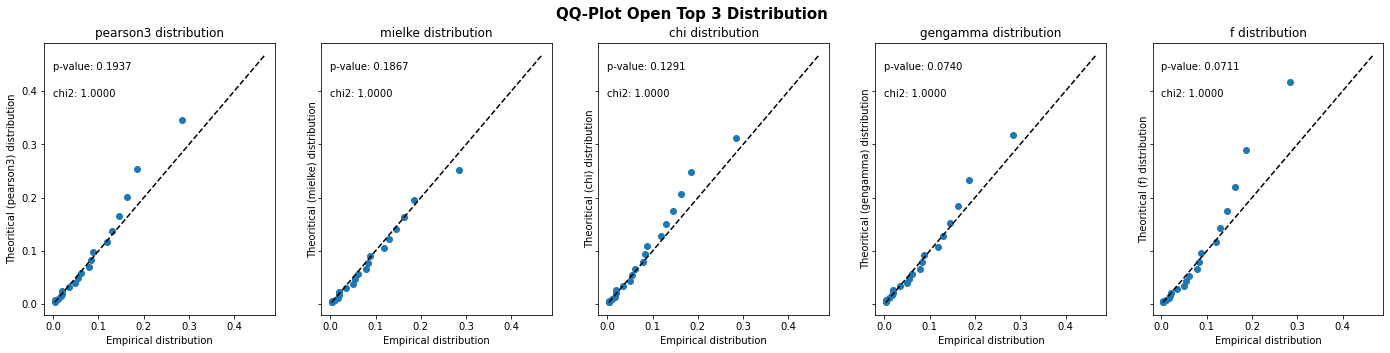

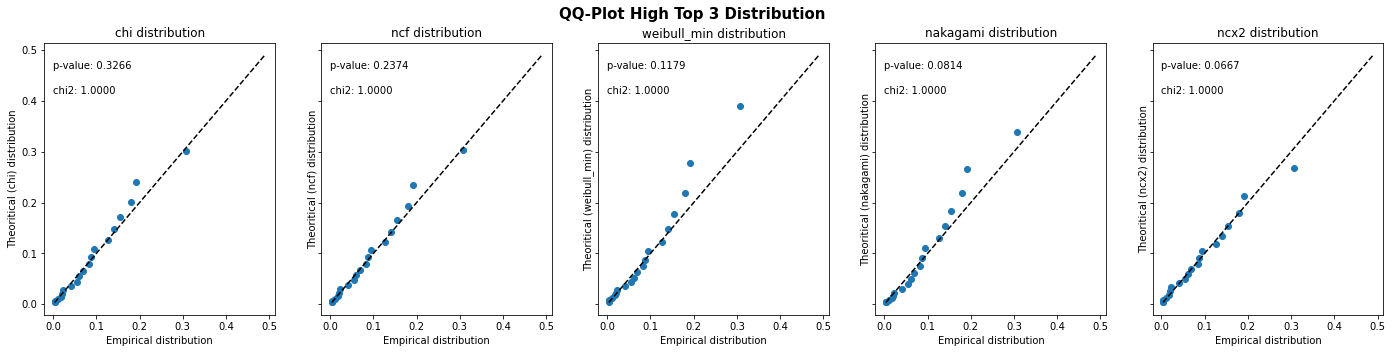

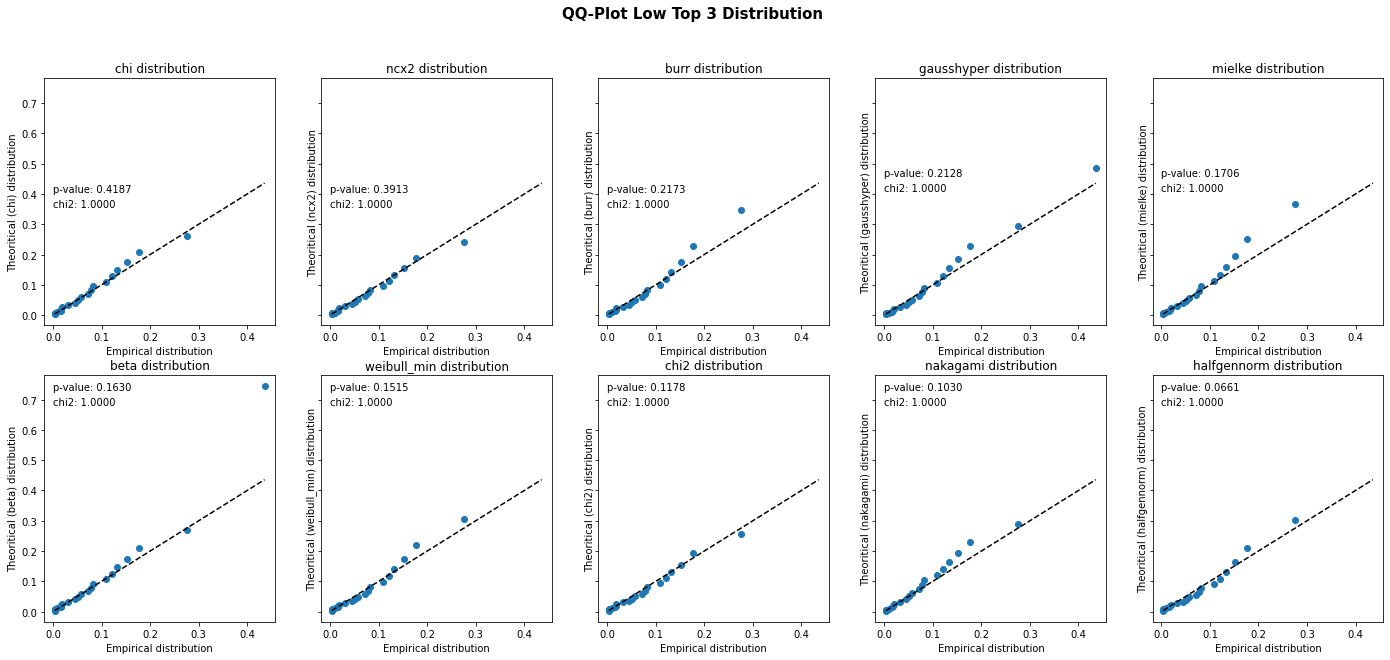

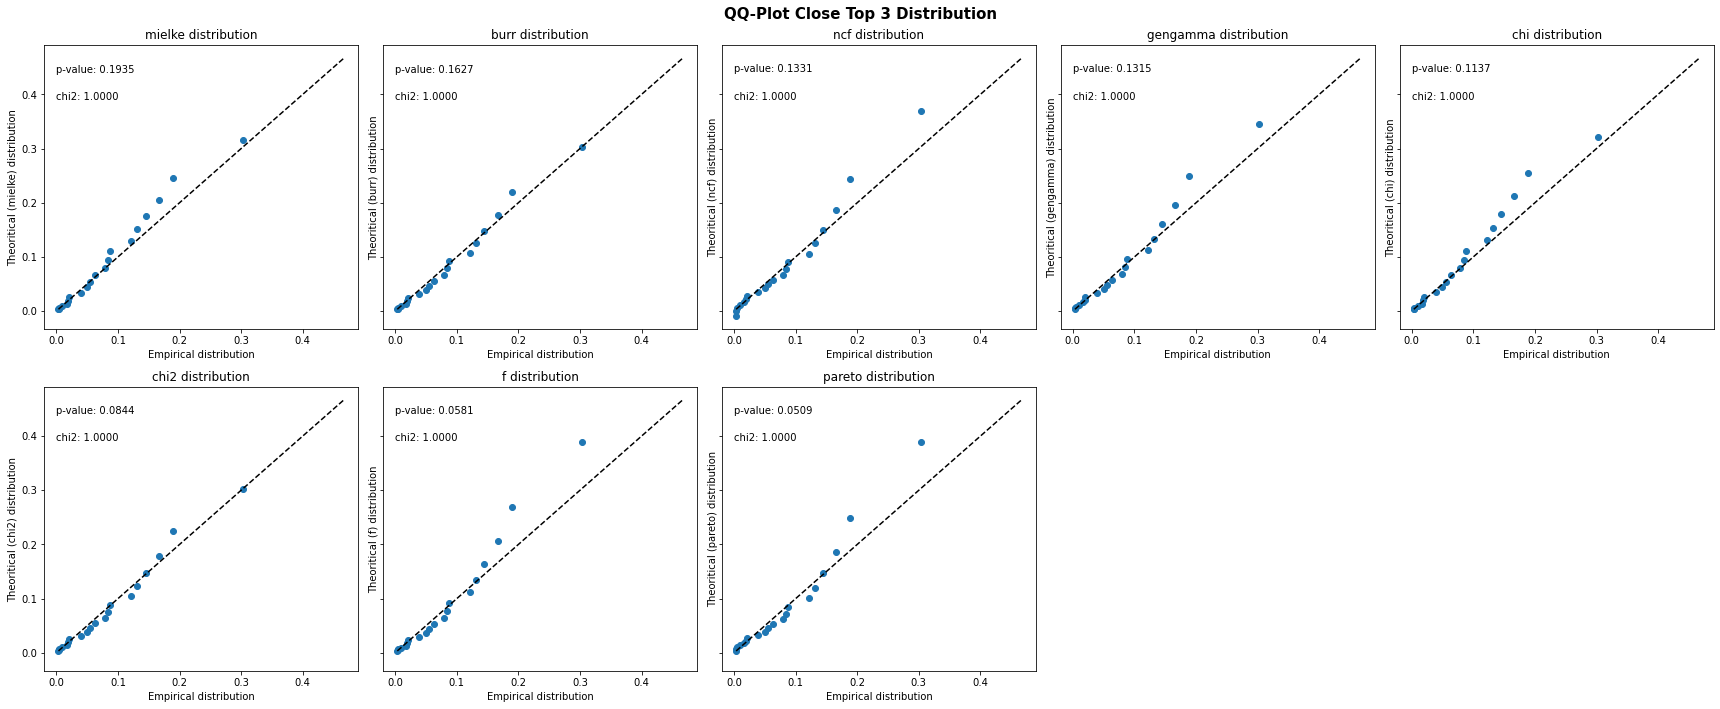

In [298]:
import math

columns = ['Open', 'High', 'Low', 'Close']
df_dist = [top_open, top_high, top_low, top_close]

for i, col in enumerate(columns):

    feature = stock[col]

    fig_row = round(len(df_dist[i])/5)
    fig_col = 5

    figsize = (24,10) if fig_row > 1 else (24, 5)
    fig, ax = plt.subplots(fig_row, fig_col, figsize=figsize, sharey=True)
    fig.suptitle('QQ-Plot {} Top 3 Distribution'.format(col), fontsize=15, fontweight='bold')

    axs = trim_axs(ax, len(df_dist[i]))

    # percentile data
    percs = np.linspace(0,100,21)
    qn_feature = np.percentile(feature, percs)    
    x = np.linspace(np.min(feature), np.max(feature))

    for ax, row in zip(axs, df_dist[i].iterrows()):
        
        row = row[1]
        dist = getattr(scipy.stats, row['distribution'])
        params = row['{}_params'.format(columns[i])]
        
        # theoritical distribution percentile
        qn_dist = dist.ppf(percs / 100.0, *params)

        # plot QQ-Plot
        ax.plot(qn_feature, qn_dist, ls='', marker='o')
        ax.plot(x, x, color='k', ls='--')

        # set XY label
        ax.set_xlabel('Empirical distribution')
        ax.set_ylabel('Theoritical ({}) distribution'.format(row['distribution']))    
        
        # set plot title
        ax.text(0,ax.get_ylim()[1] - 0.05, 'p-value: {:.4f}'.format(row[columns[i]+'_kstest']))
        ax.text(0,ax.get_ylim()[1] - 0.1, 'chi2: {:.4f}'.format(row[columns[i]+'_chi2']))        
        
        # 'p-value: {:.2f}'.format(row[columns[i]+'_kstest'])
        ax.set_title('{} distribution'.format(row['distribution']))   

plt.tight_layout()
plt.show()

Correctness of fitted distribution
==================================

In [295]:
columns = ['Open', 'High', 'Low', 'Close']
df_dist = [top_open, top_high, top_low, top_close]

for col, df in list(zip(columns, df_dist)):    
    print('{} variable - {}'.format(col, df['distribution'][0]))
            
    print('kstest p-value: ', df['{}_kstest'.format(col)][0])
    print('chi2 p-value: ', df['{}_chi2'.format(col)][0])
    print()

Open variable - pearson3
kstest p-value:  0.19374823667622043
chi2 p-value:  1.0

High variable - chi
kstest p-value:  0.3266147891183997
chi2 p-value:  1.0

Low variable - chi
kstest p-value:  0.4187244387128717
chi2 p-value:  1.0

Close variable - mielke
kstest p-value:  0.19354977595012335
chi2 p-value:  1.0

